In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('./placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [95]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

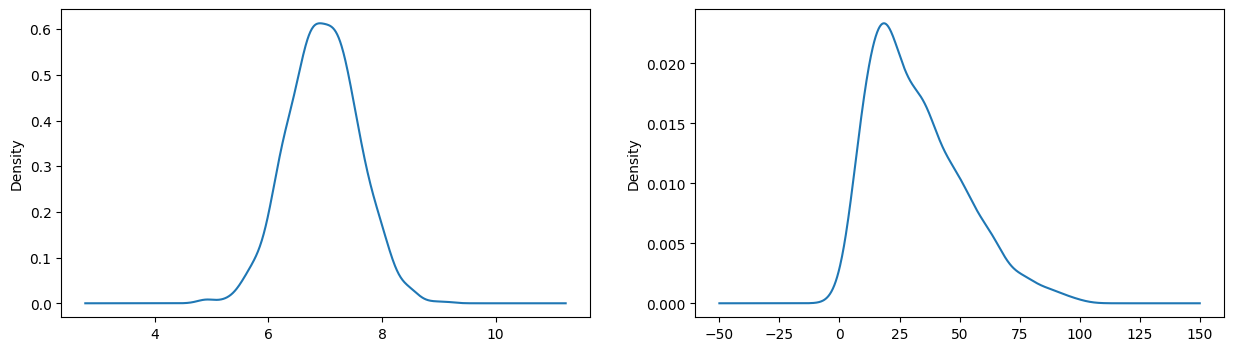

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

df['cgpa'].plot(kind='kde', ax=ax[0])
df['placement_exam_marks'].plot(kind='kde', ax=ax[1])
plt.show()

In [97]:
df['cgpa'].skew(), df['placement_exam_marks'].skew()

(np.float64(-0.014529938929314918), np.float64(0.8356419499466834))

In [98]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [99]:
upper_limit = cgpa.mean() + 3*cgpa.std()
lower_limit = cgpa.mean() - 3*cgpa.std()
maxm, minm

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [107]:
# outliers
df[(df['cgpa']>upper_limit) | (df['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [109]:
new_df = df[(cgpa<upper_limit) & (cgpa>lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [110]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


In [39]:
# using z-score normalization

df['z_score_cgpa'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,z_score_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [40]:
new_df_2 = df[(df['z_score_cgpa']>-3) & (df['z_score_cgpa']<3)]
new_df_2.describe()

,cgpa,placement_exam_marks,placed,z_score_cgpa
count,995.000000,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437,0.003437
std,0.600082,19.130298,0.500094,0.974320
min,5.230000,0.000000,0.000000,-2.810921
25%,6.550000,17.000000,0.000000,-0.667708
50%,6.960000,28.000000,0.000000,-0.002013
75%,7.365000,44.000000,1.000000,0.655563
max,8.620000,100.000000,1.000000,2.693239


In [71]:
# capping 

new_df_3 = df
new_df_3['cgpa'] = np.where(df['cgpa']>maxm, maxm, df['cgpa'])
new_df_3['cgpa'] = np.where(df['cgpa']<minm, minm, df['cgpa'])

new_df_3.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


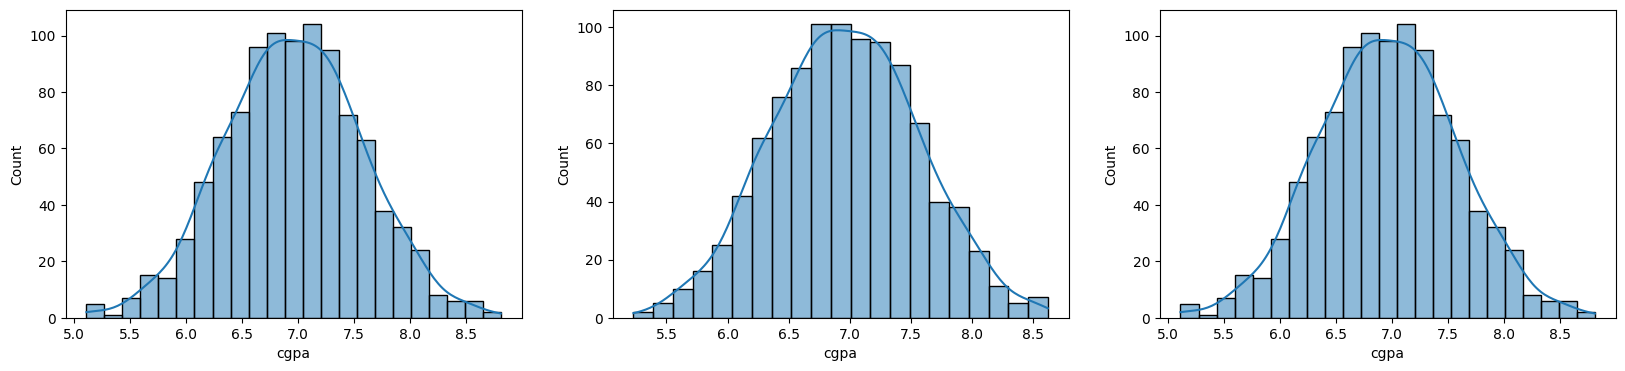

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

sns.histplot(data=df, x='cgpa', ax=ax[0], kde=True)
sns.histplot(data=new_df_2, x='cgpa', ax=ax[1], kde=True)
sns.histplot(data=new_df_3, x='cgpa', ax=ax[2], kde=True)
plt.show()